## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
from sklearn import linear_model, datasets
from sklearn.feature_selection import RFE
%matplotlib inline

## Output class dictionary

In [3]:
class_label = {
                1:'WALKING',
                2:'WALKING_UPSTAIRS',
                3:'WALKING_DOWNSTAIRS',
                4:'SITTING',
                5:'STANDING',
                6:'LAYING'
              };

## Loading Dataset (Training)

In [4]:
# Read the Feature Info
feature_info_file_name = "../dataset/features.txt";
feature_info_file = open(feature_info_file_name,'r');
feature_name = feature_info_file.read().splitlines();
print 'Number of Features : {}\n'.format(len(feature_name));

# Read the Training data
df_X_train = pd.read_csv('../dataset/train/X_train.txt',names=feature_name,header=None,delim_whitespace=True);
df_X_test  = pd.read_csv('../dataset/test/X_test.txt',names=feature_name,header=None,delim_whitespace=True);

# Read training outputs
df_y_train = pd.read_csv('../dataset/train/y_train.txt',names=['activity'],header=None);
df_y_test = pd.read_csv('../dataset/test/y_test.txt',names=['activity'],header=None);

Number of Features : 561



In [5]:
df_X_train.head()

tBodyAcc_mean_X  tBodyAcc_mean_Y  tBodyAcc_mean_Z  tBodyAcc_std_X  \
0         0.288585        -0.020294        -0.132905       -0.995279   
1         0.278419        -0.016411        -0.123520       -0.998245   
2         0.279653        -0.019467        -0.113462       -0.995380   
3         0.279174        -0.026201        -0.123283       -0.996091   
4         0.276629        -0.016570        -0.115362       -0.998139   

   tBodyAcc_std_Y  tBodyAcc_std_Z  tBodyAcc_mad_X  tBodyAcc_mad_Y  \
0       -0.983111       -0.913526       -0.995112       -0.983185   
1       -0.975300       -0.960322       -0.998807       -0.974914   
2       -0.967187       -0.978944       -0.996520       -0.963668   
3       -0.983403       -0.990675       -0.997099       -0.982750   
4       -0.980817       -0.990482       -0.998321       -0.979672   

   tBodyAcc_mad_Z  tBodyAcc_max_X         ...           \
0       -0.923527       -0.934724         ...            
1       -0.957686       -0.943068         ...            
2       -0.977469       -0.938692         ...            
3       -0.989302       -0.938692         ...            
4       -0.990441       -0.942469         ...            

   fBodyBodyGyroJerkMag_meanFreq  fBodyBodyGyroJerkMag_skewness  \
0                      -0.074323                      -0.298676   
1                       0.158075                      -0.595051   
2                       0.414503                      -0.390748   
3                       0.404573                      -0.117290   
4                       0.087753                      -0.351471   

   fBodyBodyGyroJerkMag_kurtosis  angle_tBodyAccMean_gravity_  \
0                      -0.710304                    -0.112754   
1                      -0.861499                     0.053477   
2                      -0.760104                    -0.118559   
3                      -0.482845                    -0.036788   
4                      -0.699205                     0.123320   

   angle_tBodyAccJerkMean_gravityMean  angle_tBodyGyroMean_gravityMean  \
0                            0.030400                        -0.464761   
1                           -0.007435                        -0.732626   
2                            0.177899                         0.100699   
3                           -0.012892                         0.640011   
4                            0.122542                         0.693578   

   angle_tBodyGyroJerkMean_gravityMean  angle_X_gravityMean  \
0                            -0.018446            -0.841247   
1                             0.703511            -0.844788   
2                             0.808529            -0.848933   
3                            -0.485366            -0.848649   
4                            -0.615971            -0.847865   

   angle_Y_gravityMean  angle_Z_gravityMean  
0             0.179941            -0.058627  
1             0.180289            -0.054317  
2             0.180637            -0.049118  
3             0.181935            -0.047663  
4             0.185151            -0.043892  

[5 rows x 561 columns]

## Logistic Regression (Recursive Feature Elimination , L2 regularization)
- Reference: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
- Multinomial LR: https://en.wikipedia.org/wiki/Multinomial_logistic_regression
- Feature extraction: https://machinelearningmastery.com/feature-selection-machine-learning-python/
- Feature_elimination: http://scikit-learn.org/stable/modules/feature_selection.html

value of lambda = 1

#### Initialize training and testing data

In [6]:
# Extract training features and outputs
X_train = df_X_train.values;
y_train = df_y_train.activity;
X_test = df_X_test.values;
y_test = df_y_test.activity;

#### Fit Logistic regression model

In [23]:
# Fit Multinomial regression model
logreg = linear_model.LogisticRegression(); #Lambda = 1
logreg_RFE = RFE(logreg,n_features_to_select=100,step=50);
RFE_model = logreg_RFE.fit(X_train,y_train);

In [41]:
print 'Number of Features : {}'.format(RFE_model.n_features_);
#print 'Feature Ranking : {}'.format(RFE_model.ranking_);

Number of Features : 100


#### Predict the outputs and measure performance
- Performance = Percentage of accurately predicted samples

In [25]:
# Predict outcomes for training and testing data
y_hat_train = logreg_RFE.predict(X_train);
y_hat_test = logreg_RFE.predict(X_test);

# Measure model accuracy on training and testing data
accuracy_train = 100*np.mean(y_hat_train==y_train);
accuracy_test  = 100*np.mean(y_hat_test==y_test);

print 'Accuracy on Training data is {}%'.format(accuracy_train);
print 'Accuracy on Testing data  is {}%'.format(accuracy_test);

Accuracy on Training data is 98.6126224157%
Accuracy on Testing data  is 96.2334577536%


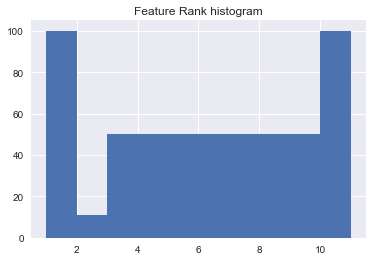

In [31]:
plt.figure(1);
#plt.plot(np.arange(1,562),RFE_model.ranking_);
plt.hist(RFE_model.ranking_)
#plt.xlabel('Feature index');
#plt.ylabel('Feature Rank');
plt.title('Feature Rank histogram');
plt.show();

## Logistic Regression L2 regularization (Feature Selection Sweep)
Value of lambda = 1

In [36]:
# Fit Multinomial regression model
num_features = np.arange(50,550,50);
accuracy_train_list_l2 = list();
accuracy_test_list_l2 = list();

for n in num_features:
    
    print 'Fitting model for {} Features\n'.format(n);
    logreg = linear_model.LogisticRegression(); #Lambda = 1
    logreg_RFE = RFE(logreg,n_features_to_select=n,step=50);
    logreg_RFE.fit(X_train,y_train);
    
    y_hat_train = logreg_RFE.predict(X_train);
    y_hat_test = logreg_RFE.predict(X_test);
    
    # Measure model accuracy on training and testing data
    accuracy_train = 100*np.mean(y_hat_train==y_train);
    accuracy_test  = 100*np.mean(y_hat_test==y_test);
    accuracy_train_list_l2.append(accuracy_train);
    accuracy_test_list_l2.append(accuracy_test);


Fitting model for 50 Features

Fitting model for 100 Features

Fitting model for 150 Features

Fitting model for 200 Features

Fitting model for 250 Features

Fitting model for 300 Features

Fitting model for 350 Features

Fitting model for 400 Features

Fitting model for 450 Features

Fitting model for 500 Features



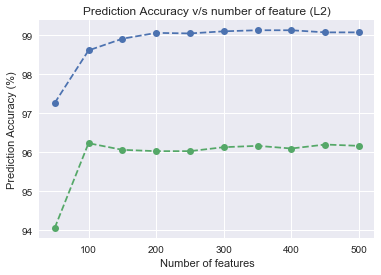

In [37]:
plt.figure(2);
plt.plot(num_features,accuracy_train_list_l2,'o--');
plt.plot(num_features,accuracy_test_list_l2,'o--');
plt.xlabel('Number of features');
plt.ylabel('Prediction Accuracy (%)');
plt.title('Prediction Accuracy v/s number of feature (L2)');
plt.show();

## Logistic Regression L1 regularization (Feature Selection Sweep)
Value of lambda = 1

In [32]:
# Fit Multinomial regression model
num_features = np.arange(50,550,50);
accuracy_train_list_l1 = list();
accuracy_test_list_l1 = list();

for n in num_features:
    
    print 'Fitting model for {} Features\n'.format(n);
    logreg = linear_model.LogisticRegression(penalty='l1'); #Lambda = 1
    logreg_RFE = RFE(logreg,n_features_to_select=n,step=50);
    logreg_RFE.fit(X_train,y_train);
    
    y_hat_train = logreg_RFE.predict(X_train);
    y_hat_test = logreg_RFE.predict(X_test);
    
    # Measure model accuracy on training and testing data
    accuracy_train = 100*np.mean(y_hat_train==y_train);
    accuracy_test  = 100*np.mean(y_hat_test==y_test);
    accuracy_train_list_l1.append(accuracy_train);
    accuracy_test_list_l1.append(accuracy_test);


Fitting model for 50 Features

Fitting model for 100 Features

Fitting model for 150 Features

Fitting model for 200 Features

Fitting model for 250 Features

Fitting model for 300 Features

Fitting model for 350 Features

Fitting model for 400 Features

Fitting model for 450 Features

Fitting model for 500 Features



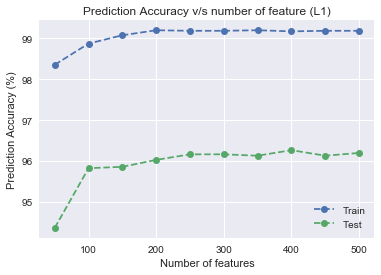

In [40]:
plt.figure(3);
plt.plot(num_features,accuracy_train_list_l1,'o--');
plt.plot(num_features,accuracy_test_list_l1,'o--');
plt.xlabel('Number of features');
plt.ylabel('Prediction Accuracy (%)');
plt.legend(['Train','Test']);
plt.title('Prediction Accuracy v/s number of feature (L1)');
plt.show();

## Comparing L1 and L2 RFE models

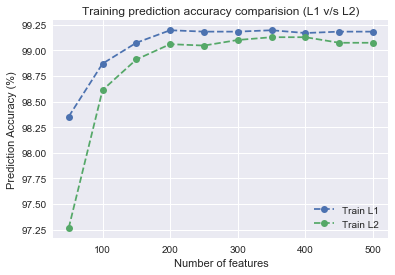

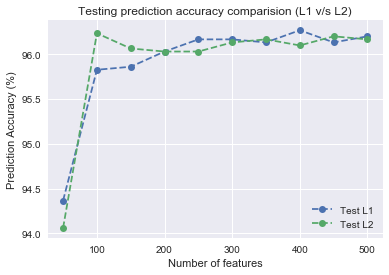

In [39]:
plt.figure(4);
plt.plot(num_features,accuracy_train_list_l1,'o--');
plt.plot(num_features,accuracy_train_list_l2,'o--');
plt.xlabel('Number of features');
plt.ylabel('Prediction Accuracy (%)');
plt.title('Training prediction accuracy comparision (L1 v/s L2)');
plt.legend(['Train L1','Train L2']);
plt.show();

plt.figure(5);
plt.plot(num_features,accuracy_test_list_l1,'o--');
plt.plot(num_features,accuracy_test_list_l2,'o--');
plt.xlabel('Number of features');
plt.ylabel('Prediction Accuracy (%)');
plt.legend(['Test L1','Test L2']);
plt.title('Testing prediction accuracy comparision (L1 v/s L2)');
plt.show();

## Plotting correlation grid of top 4 features

In [42]:
# Fit Multinomial regression model
logreg = linear_model.LogisticRegression(); #Lambda = 1
logreg_RFE = RFE(logreg,n_features_to_select=4,step=10);
RFE_model = logreg_RFE.fit(X_train,y_train);

/Users/adwarnulkar/workspace/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


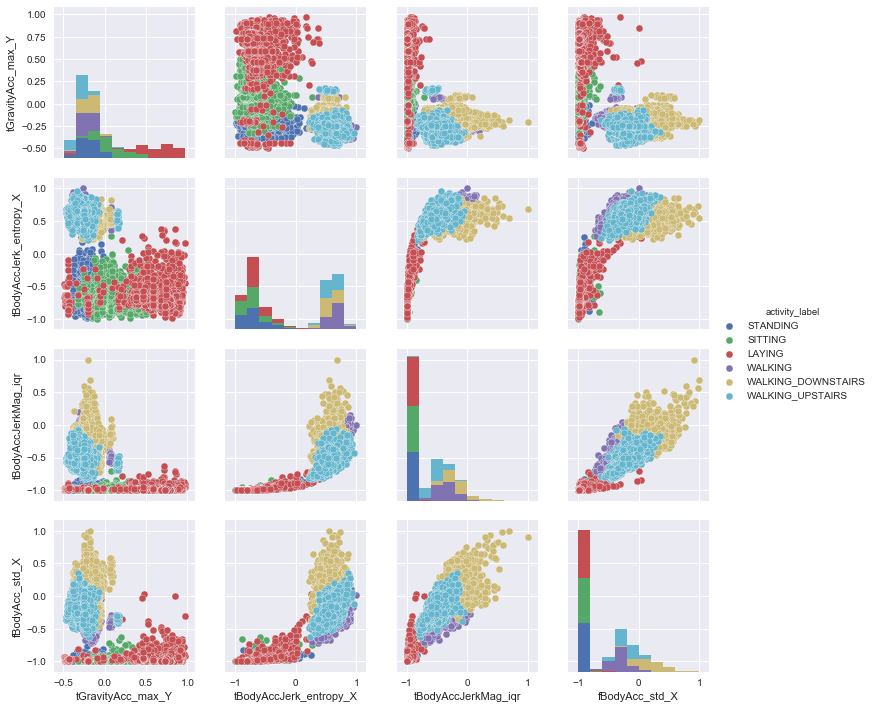

In [58]:
a = np.arange(0,561);
top = a[RFE_model.ranking_ == 1];
feature_name_top = [feature_name[x] for x in top];

df_temp = df_X_train[feature_name_top];
df_temp['activity_label'] = df_y_train['activity'];
df_temp['activity_label'].replace(class_label, inplace=True);

sns.pairplot(df_temp,hue='activity_label');

# Conclusion
- From the above plot it can be seen that best testing accuracy is obtained for L1 regularizer with lambda = 0.1
- As lambda increases training accuracy decreases , but testing accuracy first increases, reaches a maximum value and then decreases. This maximum value is what we are looking for. The motivation to perform lambda sweep was to find the optimum value of lambda which gives us the best accuracy on the testing data